In [1]:
from DeviceFingerprint.models import *
from Analyze.classification import *
import matplotlib.pyplot as plt

In [2]:
devices = Device.objects.all()

In [49]:
for device in devices:
    print(device.device_mac_address)
    


test
b0:c5:54:25:22:64
78:11:dc:11:72:af
80:1f:02:d6:d5:5d
80:1f:02:d6:d5:59
30:3a:64:8e:b1:65
c4:12:f5:1c:8c:f1


In [51]:
print(devices[0].device_mac_address)



test


In [48]:

devices[4].device_mac_address
devices[5].device_mac_address
devices[6].device_mac_address

'c4:12:f5:1c:8c:f1'

In [43]:
dlink1 = devices[1] 
dlink1_packets = dlink1.packet_set.all()
dlink1_arp_ts = get_time_series(dlink1_packets, ARP)
dlink1_tcp_ts = get_time_series(dlink1_packets, TCP)
dlink1_tls_ts = get_time_series(dlink1_packets, TLS)

sub_periods = get_sub_periods(dlink1_packets)
filtered_periods= filter_periods(sub_periods)

In [5]:
for key in filtered_periods:
    print(key)
    print(filtered_periods[key][1])

ARP
[55]
IGMP
[]
ICMP
[]
TCP
[276, 55]
UDP
[]
DNS
[]
SSDP
[]
HTTP
[]
TLS
[55]
MDNS
[]


/home/ksign/anaconda3/envs/django-env/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


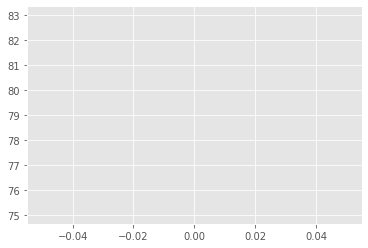

In [32]:
x = dlink1_tcp_ts
y = fft(x)
y_abs = np.absolute(y)
indices = range(0,len(x))
Yf = [ (k, y_abs[k]) for k in indices]   

plt.style.use('ggplot')
plt.plot(y[0])
plt.show()


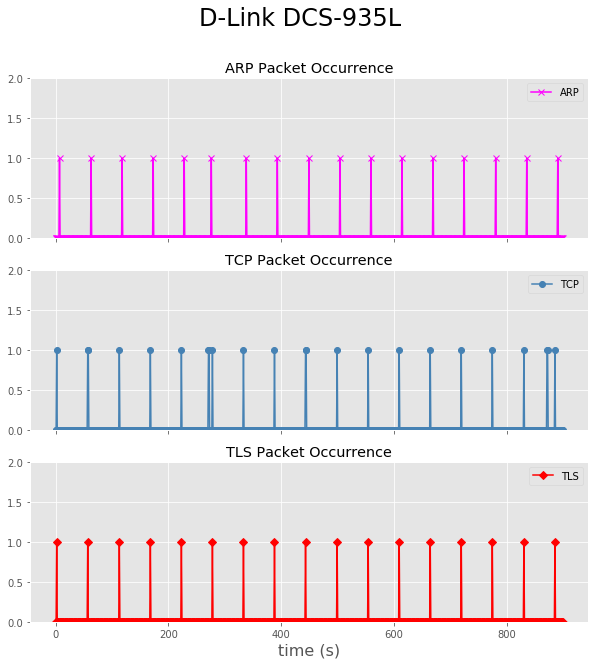

In [6]:


plt.style.use('ggplot')

x = list(range(0,900))

fig, axs = plt.subplots(3, sharex=True, sharey=True,figsize=(10,10))
fig.suptitle('D-Link DCS-935L' ,fontsize=24)
axs[0].plot(x, dlink1_arp_ts[900:1800],'-x',color='magenta')
axs[0].set_ylim([0, 2])
axs[0].legend(['ARP'])
axs[0].set_title('ARP Packet Occurrence')
axs[1].plot(x, dlink1_tcp_ts[900:1800],'-o',color='steelblue')
axs[1].legend(['TCP'])
axs[1].set_title('TCP Packet Occurrence')
axs[2].set_title('TLS Packet Occurrence')
axs[2].plot(x, dlink1_tls_ts[900:1800],'-D', color='red')
axs[2].legend(['TLS'])
axs[2].set_xlabel('time (s)',fontsize=16)

plt.savefig("DLINK .png")
plt.show()

In [7]:
xiaomi = devices[2] 
xiaomi_packets = xiaomi.packet_set.all()

xiaomi_sub_periods = get_sub_periods(xiaomi_packets)
xiaomi_filtered_periods= filter_periods(xiaomi_sub_periods)
#xiaomi_ts = get_time_series(dlink1_packets, DNS)


In [8]:

for key in xiaomi_filtered_periods:
    print(key)
    print(xiaomi_filtered_periods[key][1])

ARP
[40, 50]
IGMP
[]
ICMP
[]
TCP
[300]
UDP
[]
DNS
[328]
SSDP
[]
HTTP
[]
TLS
[]
MDNS
[]


1799


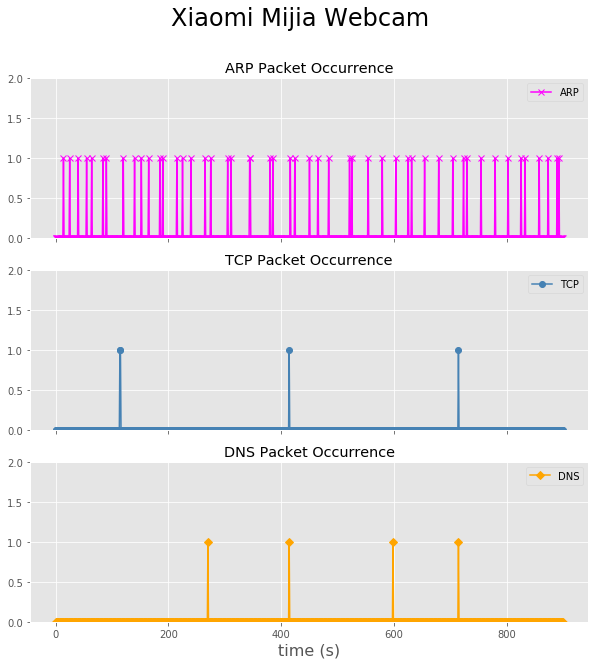

In [24]:
xiaomi_arp_ts = get_time_series(xiaomi_packets, ARP)
xiaomi_tcp_ts = get_time_series(xiaomi_packets, TCP)
xiaomi_dns_ts = get_time_series(xiaomi_packets, DNS)

plt.style.use('ggplot')
x = list(range(0,900))
fig, axs = plt.subplots(3, sharex=True, sharey=True,figsize=(10,10))
fig.suptitle('Xiaomi Mijia Webcam',fontsize=24)
print(len(xiaomi_arp_ts))
axs[0].set_title('ARP Packet Occurrence')
axs[0].plot(x, xiaomi_arp_ts[899:1800],'-x',color='magenta')
axs[0].set_ylim([0, 2])
axs[0].legend(['ARP'])
axs[1].set_title('TCP Packet Occurrence')
axs[1].plot(x, xiaomi_tcp_ts[899:1800],'-o',color='steelblue')
axs[1].legend(['TCP'])
axs[2].plot(x, xiaomi_dns_ts[899:1800],'-D',color='orange')
axs[2].legend(['DNS'])
axs[2].set_title('DNS Packet Occurrence')
axs[2].set_xlabel('time (s)',fontsize=16)
plt.savefig("Xiaomi.png")

plt.show()

In [10]:
edimax1 = devices[3]
edimax1_packets = edimax1.packet_set.all()

edimax1_sub_periods = get_sub_periods(edimax1_packets)
edimax1_filtered_periods= filter_periods(edimax1_sub_periods)



In [11]:
for key in edimax1_filtered_periods:
    print(key)
    print(edimax1_filtered_periods[key][1])

ARP
[60]
IGMP
[]
ICMP
[]
TCP
[240, 180, 120, 60]
UDP
[60]
DNS
[60]
SSDP
[]
HTTP
[]
TLS
[]
MDNS
[]


<Figure size 432x288 with 0 Axes>

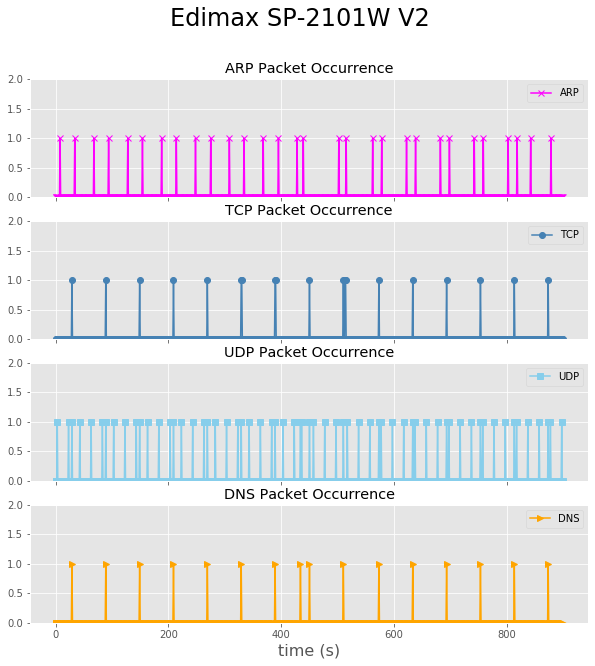

In [12]:
edimax1_arp_ts = get_time_series(edimax1_packets, ARP)
edimax1_tcp_ts = get_time_series(edimax1_packets, TCP)
edimax1_dns_ts = get_time_series(edimax1_packets, DNS)
edimax1_udp_ts = get_time_series(edimax1_packets, UDP)

plt.style.use('ggplot')
plt.subplots_adjust(hspace=0.1)
x = list(range(0,900))
fig, axs = plt.subplots(4, sharex=True, sharey=True,figsize=(10,10))
fig.suptitle('Edimax SP-2101W V2',fontsize=24)
axs[0].plot(x, edimax1_arp_ts[900:1800],'-x',color='magenta')
axs[0].set_ylim([0, 2])
axs[0].legend(['ARP'])
axs[0].set_title('ARP Packet Occurrence')
axs[1].plot(x, edimax1_tcp_ts[900:1800],'-o',color='steelblue')
axs[1].legend(['TCP'])
axs[1].set_title('TCP Packet Occurrence')
axs[2].plot(x, edimax1_udp_ts[900:1800],'-s', color='skyblue')
axs[2].legend(['UDP'])
axs[2].set_title('UDP Packet Occurrence')
axs[3].plot(x, edimax1_dns_ts[900:1800],'->',color='orange')
axs[3].legend(['DNS'])
axs[3].set_title('DNS Packet Occurrence')
axs[3].set_xlabel('time (s)',fontsize=16)
plt.savefig("edimax.png")

In [13]:
edimax2 = devices[4]
edimax2_packets = edimax2.packet_set.all()

edimax2_sub_periods = get_sub_periods(edimax2_packets)
edimax2_filtered_periods= filter_periods(edimax2_sub_periods)

In [14]:
for key in edimax2_filtered_periods:
    print(key)
    print(edimax2_filtered_periods[key][1])

ARP
[60]
IGMP
[]
ICMP
[]
TCP
[240, 180, 120, 60]
UDP
[60]
DNS
[60]
SSDP
[]
HTTP
[]
TLS
[]
MDNS
[]


In [15]:
sensor = devices[6]
sensor_packets = sensor.packet_set.all()

sensor_sub_periods = get_sub_periods(sensor_packets)
sensor_filtered_periods= filter_periods(sensor_sub_periods)


In [16]:
for key in sensor_filtered_periods:
    print(key)
    print(sensor_filtered_periods[key][1])

ARP
[26, 31]
IGMP
[]
ICMP
[]
TCP
[]
UDP
[]
DNS
[]
SSDP
[]
HTTP
[]
TLS
[]
MDNS
[]


<Figure size 432x288 with 0 Axes>

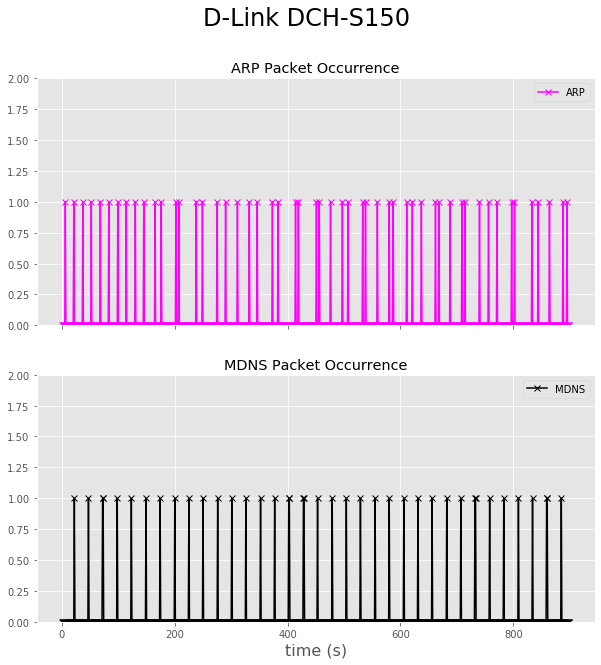

In [23]:
sensor_arp_ts = get_time_series(sensor_packets, ARP)
sensor_mdns_ts = get_time_series(sensor_packets, "MDNS")

plt.style.use('ggplot')
plt.subplots_adjust(hspace=0.1)
x = list(range(0,900))
fig, axs = plt.subplots(2, sharex=True, sharey=True,figsize=(10,10))
fig.suptitle('D-Link DCH-S150',fontsize=24)
axs[0].plot(x, sensor_arp_ts[900:1800],'-x',color='magenta')
axs[0].set_ylim([0, 2])
axs[0].legend(['ARP'])
axs[0].set_title('ARP Packet Occurrence')

axs[1].plot(x, sensor_mdns_ts[900:1800],'-x',color='black')
axs[1].set_ylim([0, 2])
axs[1].legend(['MDNS'])
axs[1].set_title('MDNS Packet Occurrence')
axs[1].set_xlabel('time (s)',fontsize=16)

plt.savefig("sensor.png")